## 1. Prediction - Frequency Analysis of the Most Frequently Drawn Number Since the Start of Records

### About this Method and the assumption we have behind it:
- There are Numbers which have been drawn slightly more than others
- We try our Luck and pick the 6 most frequently Drawn Numbers
- We do the same for the Superzahl

For our 1 Prediction (remember we play 6 Fields per Lottery tickey á 6 Numbers + 1 Superzahl (for the whole Ticket Superzahl can only be selected once))


In [1]:
# Import Libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import ast

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

### Load the Data we Stored in the data Folder with Notebook 1

In [2]:

# Load the CSV file into a DataFrame
frequency_data = pd.read_csv("/data/frequency_data.csv")
superzahl_data = pd.read_csv("/data/superzahl_data.csv")

### Now we count the Frequency of the Numbers which were drawn since the beginning of the Records

In [3]:
frequency_data.head()

,id,date,Lottozahl,Superzahl
0,1,09.10.1955,"[3, 12, 13, 16, 23, 41]",NaN
1,2,16.10.1955,"[3, 12, 18, 30, 32, 49]",NaN
2,3,23.10.1955,"[12, 14, 23, 24, 34, 36]",NaN
3,4,30.10.1955,"[4, 13, 23, 30, 36, 44]",NaN
4,5,06.11.1955,"[5, 6, 31, 39, 44, 49]",NaN


In [4]:
frequency_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4795 entries, 0 to 4794
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         4795 non-null   int64  
 1   date       4795 non-null   object 
 2   Lottozahl  4795 non-null   object 
 3   Superzahl  2909 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 150.0+ KB


### We See Lottozahl is a String looking like 1 List 
we will handle this in the process

PLEASE RUN EACH LINE ONLY ONCE OTHERWISE U WILL RUN INTO AN ERROR FOR THE TRANSFORMING WE DO HERE

In [5]:
# Convert the string representations of lists to lists
frequency_data["Lottozahl"] = frequency_data["Lottozahl"].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# define lotto_numbers this will make a 1 column DF with 6* same Index for 1 drawing
# So 6 rows for each drawing in this column now 
lotto_numbers = frequency_data["Lottozahl"].explode().astype(int)
lotto_numbers_count = lotto_numbers.value_counts().sort_values(ascending=False)

# Counting Values drawn of Superzahl and order then by most frequent
superzahl_counts = superzahl_data["Superzahl"].astype(int).value_counts().sort_values(ascending=False)

# Plot our Numbers Drawn with Countplots

### For Lottozahlen

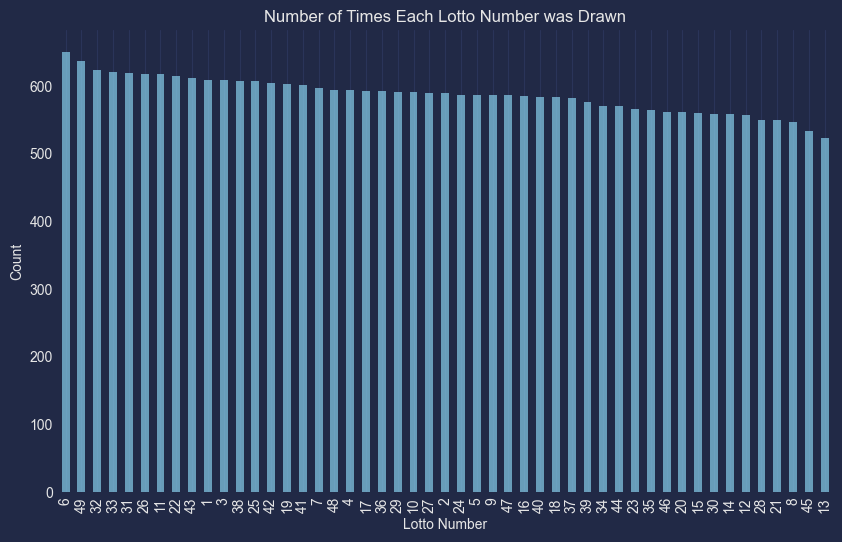

In [12]:
# Plot Lottozahl counts
plt.figure(figsize=(10, 6))
lotto_numbers_count.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Number of Times Each Lotto Number was Drawn')
plt.xlabel('Lotto Number')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [13]:
# Readable Format
print("Amount of Drawn per Number:", lotto_numbers_count)

Amount of Drawn per Number: Lottozahl
6     650
49    637
32    624
33    620
31    619
26    618
11    617
22    615
43    612
1     609
3     609
38    607
25    607
42    604
19    603
41    602
7     597
48    594
4     594
17    592
36    592
29    591
10    591
27    590
2     589
24    587
5     587
9     587
47    586
16    585
40    584
18    583
37    582
39    576
34    571
44    570
23    566
35    565
46    561
20    561
15    560
30    559
14    558
12    557
28    550
21    549
8     546
45    534
13    523
Name: count, dtype: int64


### For the Superzahl

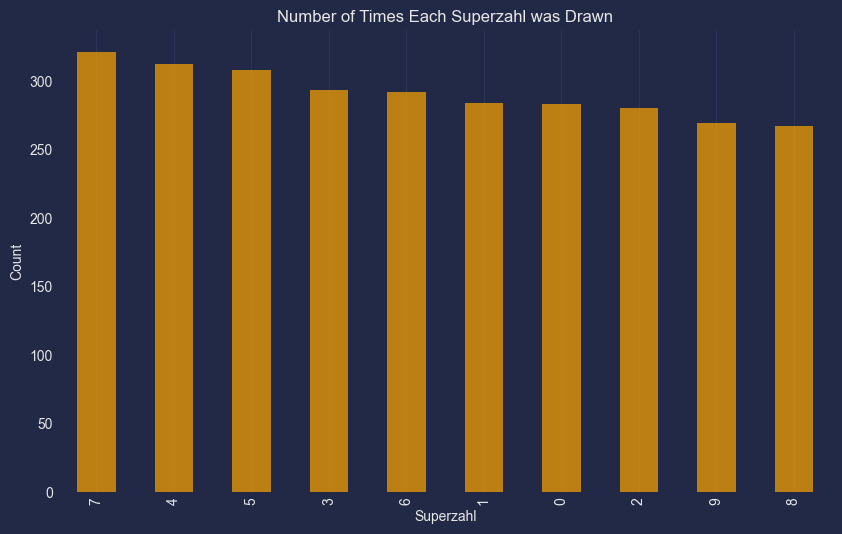

In [14]:
# Plot Superzahl counts
plt.figure(figsize=(10, 6))
superzahl_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Number of Times Each Superzahl was Drawn')
plt.xlabel('Superzahl')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [17]:
# Readable Format
print("Superzahl drawn by Number:",superzahl_counts)

Superzahl drawn by Number: Superzahl
7    321
4    312
5    308
3    293
6    292
1    284
0    283
2    280
9    269
8    267
Name: count, dtype: int64


# Predictions for the 1 Lottery Ticket Field!

### DISCLAIMER:
- This is a Fun Project to Showcase some IT Skills
- Lottery is a total statistically Random Game
- Do not use or let you inspire by this Prediction!
- Gambling can make you addicted! Only Play with Caution!
- I claim no rights, that my outputs would even be near the drawn value

### About the Predictions:
- In Field 1 we go for the Most Frequent Numbers each Lottery Ticket we play
- The Superzahl only appears once per Lottery Ticket - we will Take 7 and 4 in rotation for each Ticket
- This is a common Lottery Strategy - even if you win with this Numbers, you would have to share the Prize Pool with many other People
- We will do more complex Prediction Strategies in later Notebooks
- This prediction will be the same for several Weeks till another number gets into Top 6

In [29]:
# Format the first 6 Numbers for better Output
first_six_numbers = lotto_numbers_count.head(6)
formatted_numbers = ', '.join(map(str, first_six_numbers.index))

# Format the Output of the Superzahl
superzahl_number = superzahl_counts.head(1)


# Print your Lucky Numbers
print("Your Lucky Numbers For Field 1(Frequency Analysis):",formatted_numbers," Superzahl:", superzahl_number.index[0])

Your Lucky Numbers For Field 1(Frequency Analysis): 6, 49, 32, 33, 31, 26  Superzahl: 7
